In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MaxAbsScaler
import tensorflow as tf
from tensorflow import keras

c:\python 3.9\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
data = pd.read_csv("Data/dataset1.csv")

In [3]:
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


In [4]:
labels = data[["Output"]]
feature_matrix = data.drop("Output", axis=1)


In [5]:
feature_matrix

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26
...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53


In [6]:
feature_matrix.shape

(880, 12)

In [98]:
out = data["Output"]

In [8]:
# feature_matrix_scaled = MaxAbsScaler().fit_transform(feature_matrix)
feature_matrix_scaled = feature_matrix

In [9]:
feature_matrix_scaled

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26
...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53


In [10]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix_scaled, data["Output"], test_size = 0.2, random_state = 42)

In [11]:
X_train

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
290,257,7.5,887,7.50,0.29,0.79,4.50,0.26,2.84,0.67,6.76,0.12
685,345,76.8,676,7.10,0.70,0.38,8.20,0.34,0.83,0.27,6.13,0.32
547,320,12.3,676,7.90,0.50,0.59,9.95,0.38,8.24,0.96,11.05,0.27
835,201,8.3,697,7.48,0.81,0.20,6.64,0.53,5.60,0.86,11.30,0.63
798,201,89.9,454,7.43,0.53,0.78,6.94,0.55,8.21,2.01,7.54,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...
106,69,4.4,507,7.70,0.53,0.10,5.13,0.39,4.02,1.03,13.05,0.25
270,282,7.0,401,7.71,0.48,0.18,2.50,0.24,2.48,0.67,7.64,0.10
860,339,7.5,475,7.00,0.88,0.98,6.94,0.54,7.15,0.39,10.59,0.34
435,295,7.0,433,7.41,0.35,0.49,8.45,0.48,2.05,2.01,6.36,0.61


In [12]:
X_train.shape

(704, 12)

In [13]:
y_train_new = y_train.values.ravel()
y_test_new = y_test.values.ravel()
out_new = out.values.ravel()

In [14]:
y_train_new

array([1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [107]:
model = GradientBoostingClassifier(n_estimators = 75, learning_rate = 0.12, max_depth = 7, min_samples_leaf=7, subsample=0.6, random_state=0)
my_model = model.fit(X_train, y_train_new)
model.score(X_test, y_test)

0.8920454545454546

In [108]:
model_accuracy = accuracy_score(y_test_new, model.predict(X_test))

In [109]:
model_accuracy

0.8920454545454546

In [113]:
y_grad = model.predict(X_test)

In [114]:
print(classification_report(y_test_new, y_grad))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        78
           1       0.90      0.89      0.89        88
           2       1.00      0.30      0.46        10

    accuracy                           0.89       176
   macro avg       0.93      0.72      0.76       176
weighted avg       0.90      0.89      0.88       176



In [19]:
# pd.DataFrame(my_model.history).plot()

In [20]:
model_2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(12,)),
        tf.keras.layers.Dense(units = 15, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
        tf.keras.layers.Dense(units = 6, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
        tf.keras.layers.Dense(units = 3, activation = 'softmax'),
    ]
)

In [21]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                195       
                                                                 
 dense_1 (Dense)             (None, 6)                 96        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
my_model2 = model_2.fit(X_train, y_train_new, epochs=500, validation_data=(X_test, y_test_new))

Epoch 1/500


c:\python 3.9\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/22 [===============>..............] - ETA: 0s - loss: 5.6754 - accuracy: 0.4089   

c:\python 3.9\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


22/22 [==============================] - 6s 37ms/step - loss: 3.7204 - accuracy: 0.4574 - val_loss: 1.2827 - val_accuracy: 0.4943
Epoch 2/500
22/22 [==============================] - 0s 8ms/step - loss: 1.1781 - accuracy: 0.4688 - val_loss: 1.0658 - val_accuracy: 0.5000
Epoch 3/500
22/22 [==============================] - 0s 7ms/step - loss: 0.9907 - accuracy: 0.5653 - val_loss: 0.9635 - val_accuracy: 0.6648
Epoch 4/500
22/22 [==============================] - 0s 7ms/step - loss: 0.9138 - accuracy: 0.6463 - val_loss: 0.9474 - val_accuracy: 0.6193
Epoch 5/500
22/22 [==============================] - 0s 8ms/step - loss: 0.8251 - accuracy: 0.7415 - val_loss: 0.9487 - val_accuracy: 0.6534
Epoch 6/500
22/22 [==============================] - 0s 7ms/step - loss: 0.7733 - accuracy: 0.7315 - val_loss: 0.8517 - val_accuracy: 0.6818
Epoch 7/500
22/22 [==============================] - 0s 8ms/step - loss: 0.7273 - accuracy: 0.7585 - val_loss: 0.8130 - val_accuracy: 0.6875
Epoch 8/500
22/22 [=====

<AxesSubplot:>

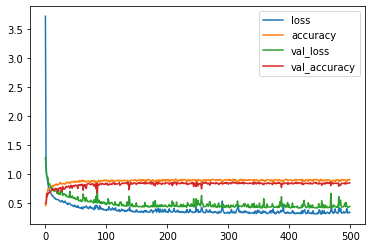

In [24]:
pd.DataFrame(my_model2.history).plot()

In [25]:
print(pd.DataFrame(my_model2.history)["accuracy"].max())

0.9147727489471436


In [26]:
# print(classification_report(y_test, model_2.predict(X_test)))

In [27]:
response = model_2.predict(X_test)

6/6 [==============================] - 1s 4ms/step


In [28]:
response

array([[2.7028682e-02, 9.3871635e-01, 3.4254920e-02],
       [8.5116255e-01, 1.4712547e-01, 1.7119157e-03],
       [9.5851719e-01, 4.1128345e-02, 3.5440997e-04],
       [9.5851719e-01, 4.1128345e-02, 3.5440997e-04],
       [9.5851719e-01, 4.1128345e-02, 3.5440997e-04],
       [8.3006166e-02, 8.9172512e-01, 2.5268719e-02],
       [9.5851719e-01, 4.1128345e-02, 3.5440997e-04],
       [5.8594836e-05, 8.8098121e-01, 1.1896023e-01],
       [9.0870344e-08, 6.6143805e-01, 3.3856186e-01],
       [9.5851719e-01, 4.1128345e-02, 3.5440997e-04],
       [3.1962376e-03, 9.4228208e-01, 5.4521658e-02],
       [9.1284674e-01, 8.6271942e-02, 8.8135147e-04],
       [1.6943304e-04, 9.0240109e-01, 9.7429439e-02],
       [1.6214781e-04, 9.0158874e-01, 9.8249100e-02],
       [9.5851719e-01, 4.1128345e-02, 3.5440997e-04],
       [3.9343811e-03, 9.4382787e-01, 5.2237775e-02],
       [3.2804921e-01, 6.5894192e-01, 1.3008917e-02],
       [9.7563617e-02, 8.7847275e-01, 2.3963647e-02],
       [9.5851719e-01, 4.112

In [29]:
response.shape

(176, 3)

In [30]:
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


In [31]:
data[data["Output"] == 2]
data[data["Output"] == 2].shape

(39, 13)

In [32]:
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


In [33]:
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


In [34]:
feature_matrix

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26
...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53


In [35]:
# X

In [36]:
# X

In [37]:
X_train

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
290,257,7.5,887,7.50,0.29,0.79,4.50,0.26,2.84,0.67,6.76,0.12
685,345,76.8,676,7.10,0.70,0.38,8.20,0.34,0.83,0.27,6.13,0.32
547,320,12.3,676,7.90,0.50,0.59,9.95,0.38,8.24,0.96,11.05,0.27
835,201,8.3,697,7.48,0.81,0.20,6.64,0.53,5.60,0.86,11.30,0.63
798,201,89.9,454,7.43,0.53,0.78,6.94,0.55,8.21,2.01,7.54,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...
106,69,4.4,507,7.70,0.53,0.10,5.13,0.39,4.02,1.03,13.05,0.25
270,282,7.0,401,7.71,0.48,0.18,2.50,0.24,2.48,0.67,7.64,0.10
860,339,7.5,475,7.00,0.88,0.98,6.94,0.54,7.15,0.39,10.59,0.34
435,295,7.0,433,7.41,0.35,0.49,8.45,0.48,2.05,2.01,6.36,0.61


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [39]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [40]:
X_train_std


array([[ 0.13244251, -0.32041273,  3.05921221, ..., -0.59400136,
        -0.46581803, -0.8103952 ],
       [ 1.25966853,  2.83400647,  1.37334967, ..., -1.45312198,
        -0.61330069, -0.45349787],
       [ 0.93943387, -0.10192482,  1.37334967, ...,  0.02886108,
         0.53846867, -0.54272221],
       ...,
       [ 1.18281221, -0.32041273, -0.23261417, ..., -1.19538579,
         0.43078292, -0.41780814],
       [ 0.6191992 , -0.34317188, -0.5681887 , ...,  2.2840527 ,
        -0.55945782,  0.06400325],
       [ 0.6191992 , -0.44331218, -1.4151149 , ..., -0.93764961,
         0.06558775,  0.51012491]])

In [41]:
svm = SVC(kernel='rbf', decision_function_shape='ovr')

In [42]:
y_train_new

array([1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [43]:
svm.fit(X_train_std, y_train_new)

SVC()

In [44]:
svm_predict = svm.predict(X_test_std)

In [45]:
svm.score(X_test_std, y_test_new)

0.8068181818181818

In [46]:
accuracy_score(y_test_new, svm_predict)

0.8068181818181818

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
model = MultinomialNB()
model.fit(X_train, y_train_new)

MultinomialNB()

In [49]:
y_naive = model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test_new, y_naive)
cm = confusion_matrix(y_test_new, y_naive)
print('Accuracy for Naive Bayes is: ',ac)

Accuracy for Naive Bayes is:  0.6590909090909091


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
# Train the model on training data
rf.fit(X_train, y_train_new)

RandomForestClassifier(random_state=42)

In [52]:
predictions = rf.predict(X_test)

In [53]:
rf.score(X_test,y_test_new)

0.8863636363636364

In [54]:
accuracy_score(y_test_new, predictions)

0.8863636363636364

In [55]:
import xgboost as xgb

In [56]:
model_xgbclassifier = xgb.XGBClassifier(learning_rate = 0.2, n_estimators = 100, max_depth = 3, objective="multi:softmax")

In [57]:
model_xgbclassifier.fit(X_train, y_train_new)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [58]:
y_xgb = model_xgbclassifier.predict(X_test)

In [59]:
model_xgbclassifier.score(X_test, y_xgb)

1.0

In [60]:
accuracy_score(y_test_new, y_xgb)

0.8693181818181818

In [61]:
X_train

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
290,257,7.5,887,7.50,0.29,0.79,4.50,0.26,2.84,0.67,6.76,0.12
685,345,76.8,676,7.10,0.70,0.38,8.20,0.34,0.83,0.27,6.13,0.32
547,320,12.3,676,7.90,0.50,0.59,9.95,0.38,8.24,0.96,11.05,0.27
835,201,8.3,697,7.48,0.81,0.20,6.64,0.53,5.60,0.86,11.30,0.63
798,201,89.9,454,7.43,0.53,0.78,6.94,0.55,8.21,2.01,7.54,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...
106,69,4.4,507,7.70,0.53,0.10,5.13,0.39,4.02,1.03,13.05,0.25
270,282,7.0,401,7.71,0.48,0.18,2.50,0.24,2.48,0.67,7.64,0.10
860,339,7.5,475,7.00,0.88,0.98,6.94,0.54,7.15,0.39,10.59,0.34
435,295,7.0,433,7.41,0.35,0.49,8.45,0.48,2.05,2.01,6.36,0.61


In [62]:
from sklearn.tree import DecisionTreeClassifier
y_train_std=y_train
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state= 0)
classifier.fit(X_train_std,y_train_new)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
y_pred = classifier.predict(X_test_std)

In [64]:
accuracy_score(y_test_new, y_pred)

0.8295454545454546

In [115]:
print("XGBClassifier:")
print(classification_report(y_test_new,y_xgb))
print("Naive Bayes:")
print(classification_report(y_test_new,y_naive))
print("Random Forest:")
print(classification_report(y_test_new, predictions))
print("Support Vector Machine:")
print(classification_report(y_test_new, svm_predict))
print("Decision trees:")
print(classification_report(y_test_new, y_pred))
print("Grad Boost:")
print(classification_report(y_test_new, y_grad))

XGBClassifier:
              precision    recall  f1-score   support

           0       0.86      0.97      0.92        78
           1       0.88      0.88      0.88        88
           2       0.00      0.00      0.00        10

    accuracy                           0.87       176
   macro avg       0.58      0.62      0.60       176
weighted avg       0.82      0.87      0.84       176

Naive Bayes:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68        78
           1       0.67      0.73      0.70        88
           2       0.23      0.30      0.26        10

    accuracy                           0.66       176
   macro avg       0.54      0.55      0.54       176
weighted avg       0.67      0.66      0.66       176

Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        78
           1       0.88      0.89      0.88        88
           2       0.00      0.0

c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetric

In [67]:
from sklearn import ensemble


In [68]:
forestClassifier = ensemble.RandomForestClassifier(random_state=42)

In [69]:
paramGrid = { 
    'n_estimators': [200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6 ,7 ,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [70]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=forestClassifier, param_grid=paramGrid, cv= 5)

In [71]:
clf.fit(X_train, y_train_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [72]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 300}

In [93]:
randomForestModel = ensemble.RandomForestClassifier(criterion = 'gini',
 max_depth = 4,
 max_features = 'auto',
 n_estimators = 300, random_state=42)

In [94]:
randomForestModel.fit(X_train, y_train_new)

RandomForestClassifier(max_depth=4, n_estimators=300, random_state=42)

In [95]:
predictions = randomForestModel.predict(X_test)

In [96]:
accuracy_score(y_test_new, predictions)

0.875

In [97]:
print(classification_report(y_test_new, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        78
           1       0.88      0.89      0.88        88
           2       0.00      0.00      0.00        10

    accuracy                           0.88       176
   macro avg       0.58      0.62      0.60       176
weighted avg       0.83      0.88      0.85       176



c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
randomForestModel.fit(feature_matrix, out)

RandomForestClassifier(max_depth=4, n_estimators=300, random_state=42)

In [101]:
predictions_2 = randomForestModel.predict(X_test)

In [102]:
accuracy_score(y_test_new, predictions_2)

0.875

In [103]:
print(classification_report(y_test_new, predictions_2))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        78
           1       0.88      0.89      0.88        88
           2       0.00      0.00      0.00        10

    accuracy                           0.88       176
   macro avg       0.58      0.62      0.60       176
weighted avg       0.83      0.88      0.85       176



c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
print(classification_report(y_test_new, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        78
           1       0.90      0.89      0.89        88
           2       1.00      0.30      0.46        10

    accuracy                           0.89       176
   macro avg       0.93      0.72      0.76       176
weighted avg       0.90      0.89      0.88       176

